In [185]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [186]:
warnings.filterwarnings('ignore')

In [187]:
data = pd.read_csv("//content/CIPLA.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [188]:
data.drop(['Date'], axis=1, inplace=True)

In [189]:
print(data.head())
print(data.shape)
print(data.columns)

  Symbol Series  Prev Close    Open     High      Low     Last    Close  \
0  CIPLA     EQ     1349.40  1410.0  1457.35  1380.05  1457.35  1457.35   
1  CIPLA     EQ     1457.35  1537.0  1537.00  1430.00  1466.05  1465.25   
2  CIPLA     EQ     1465.25  1474.0  1474.00  1365.00  1441.00  1435.05   
3  CIPLA     EQ     1435.05  1434.0  1435.00  1349.00  1365.00  1355.85   
4  CIPLA     EQ     1355.85  1370.0  1389.90  1247.40  1247.40  1247.55   

      VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  1441.36   21060  3.035496e+12     NaN                 NaN          NaN  
1  1460.43   30215  4.412698e+12     NaN                 NaN          NaN  
2  1428.11   33799  4.826872e+12     NaN                 NaN          NaN  
3  1390.55   33083  4.600356e+12     NaN                 NaN          NaN  
4  1267.49   66536  8.433351e+12     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Cl

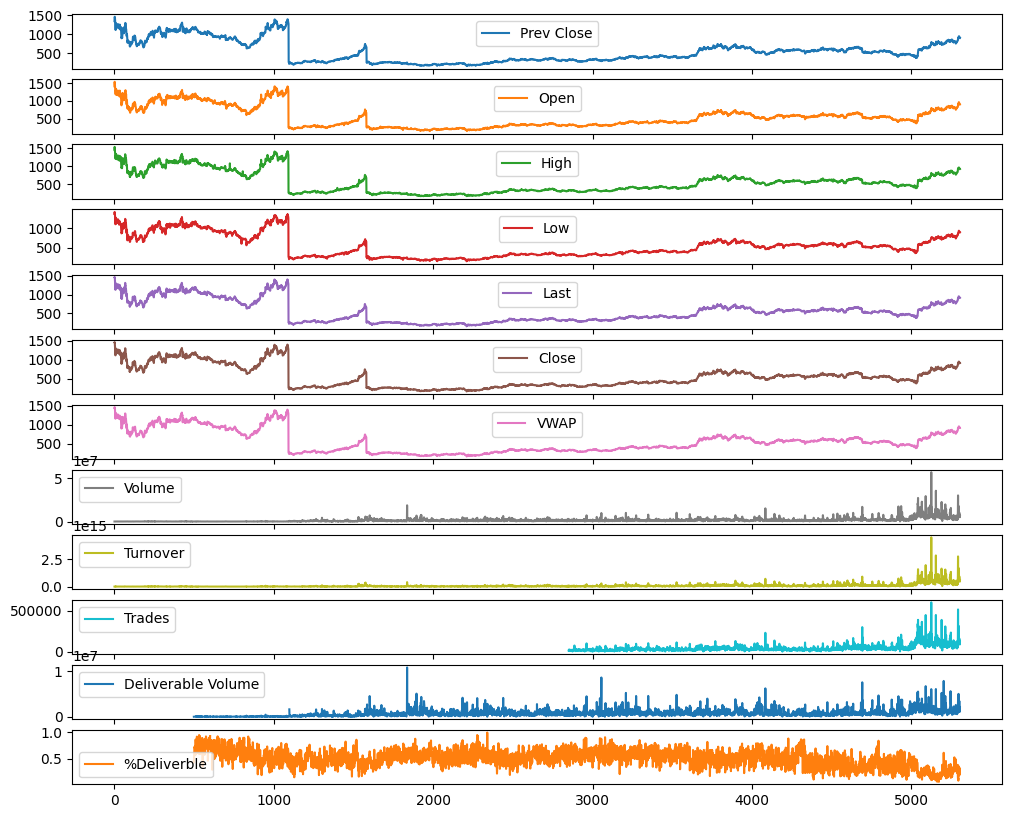

Symbol                   1
Series                   1
Prev Close            4470
Open                  3094
High                  3673
Low                   3738
Last                  3776
Close                 4470
VWAP                  5119
Volume                5298
Turnover              5306
Trades                2425
Deliverable Volume    4784
%Deliverble           3249
dtype: int64

In [190]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [191]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


     Symbol Series  Prev Close     Open     High      Low     Last    Close  \
0     CIPLA     EQ     1349.40  1410.00  1457.35  1380.05  1457.35  1457.35   
1     CIPLA     EQ     1457.35  1537.00  1537.00  1430.00  1466.05  1465.25   
2     CIPLA     EQ     1465.25  1474.00  1474.00  1365.00  1441.00  1435.05   
3     CIPLA     EQ     1435.05  1434.00  1435.00  1349.00  1365.00  1355.85   
4     CIPLA     EQ     1355.85  1370.00  1389.90  1247.40  1247.40  1247.55   
...     ...    ...         ...      ...      ...      ...      ...      ...   
5301  CIPLA     EQ      935.60   935.60   940.00   902.15   907.95   905.40   
5302  CIPLA     EQ      905.40   913.00   919.50   901.00   911.20   912.40   
5303  CIPLA     EQ      912.40   914.35   918.00   902.95   906.25   910.20   
5304  CIPLA     EQ      910.20   911.95   917.40   904.00   906.00   906.50   
5305  CIPLA     EQ      906.50   900.75   921.00   900.75   910.00   910.35   

         VWAP    Volume      Turnover    Trades  De

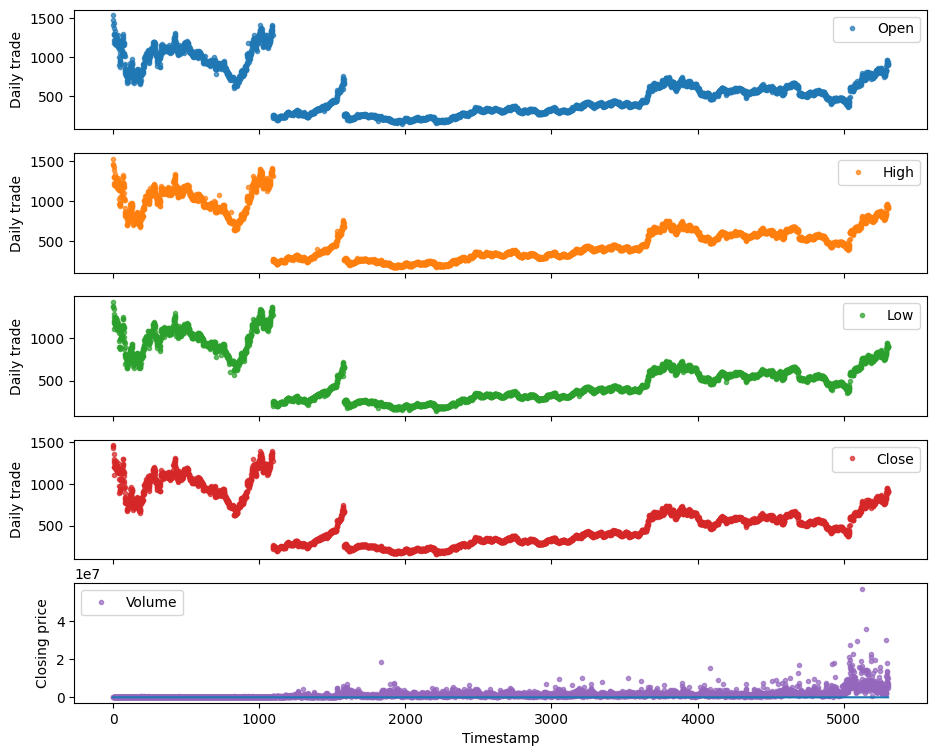

In [192]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [193]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

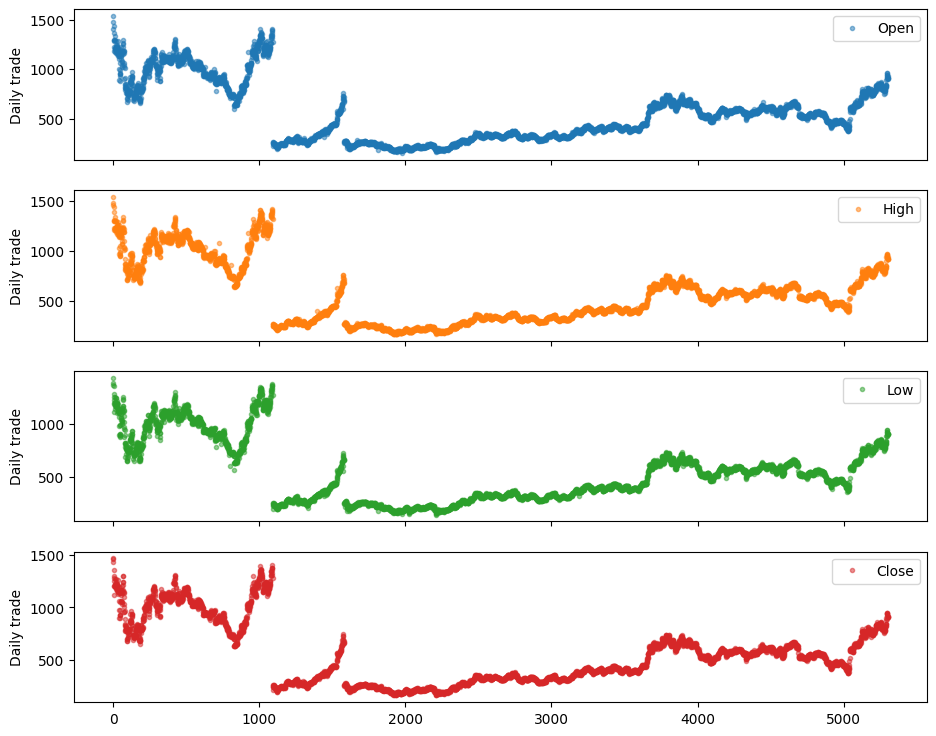

In [194]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

     Symbol Series  Prev Close     Open     High      Low     Last    Close  \
0     CIPLA     EQ     1349.40  1410.00  1457.35  1380.05  1457.35  1457.35   
1     CIPLA     EQ     1457.35  1537.00  1537.00  1430.00  1466.05  1465.25   
2     CIPLA     EQ     1465.25  1474.00  1474.00  1365.00  1441.00  1435.05   
3     CIPLA     EQ     1435.05  1434.00  1435.00  1349.00  1365.00  1355.85   
4     CIPLA     EQ     1355.85  1370.00  1389.90  1247.40  1247.40  1247.55   
...     ...    ...         ...      ...      ...      ...      ...      ...   
5301  CIPLA     EQ      935.60   935.60   940.00   902.15   907.95   905.40   
5302  CIPLA     EQ      905.40   913.00   919.50   901.00   911.20   912.40   
5303  CIPLA     EQ      912.40   914.35   918.00   902.95   906.25   910.20   
5304  CIPLA     EQ      910.20   911.95   917.40   904.00   906.00   906.50   
5305  CIPLA     EQ      906.50   900.75   921.00   900.75   910.00   910.35   

         VWAP    Volume      Turnover    Trades  De

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,5.405038e+02,2.893198e+02,1.601000e+02,3.090250e+02,4.738500e+02,6.819375e+02,1.465250e+03
Open,5306.0,5.414578e+02,2.899560e+02,1.505500e+02,3.099625e+02,4.746250e+02,6.832250e+02,1.537000e+03
High,5306.0,5.495877e+02,2.950877e+02,1.694500e+02,3.127500e+02,4.799500e+02,6.917875e+02,1.537000e+03
Low,5306.0,5.321436e+02,2.838689e+02,1.450000e+02,3.053500e+02,4.688750e+02,6.716750e+02,1.430000e+03
Last,5306.0,5.404726e+02,2.891581e+02,1.520000e+02,3.090000e+02,4.735250e+02,6.819375e+02,1.466050e+03
Close,5306.0,5.404211e+02,2.891512e+02,1.601000e+02,3.090250e+02,4.738500e+02,6.819375e+02,1.465250e+03
VWAP,5306.0,5.409316e+02,2.894112e+02,1.581400e+02,3.092900e+02,4.752150e+02,6.820350e+02,1.460430e+03
Volume,5306.0,1.550071e+06,2.317962e+06,5.050000e+02,3.790408e+05,1.047786e+06,1.815542e+06,5.689556e+07
Turnover,5306.0,7.841696e+13,1.620908e+14,5.400606e+10,1.447839e+13,3.725861e+13,7.848478e+13,4.498902e+15
Trades,2456.0,4.496725e+04,4.377605e+04,6.130000e+02,2.172400e+04,3.296700e+04,5.086950e+04,6.033610e+05


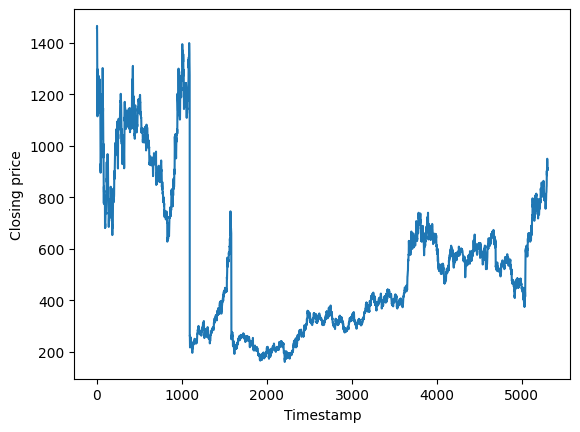

In [195]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [196]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [197]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 13ms/step - loss: 0.0194 - mse: 0.0194 - mae: 0.0841 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0395
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0332 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0276
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0289 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0246
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0275 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0234
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0259 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0222
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0245 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0214
Epoch 7/100
66/66 [==

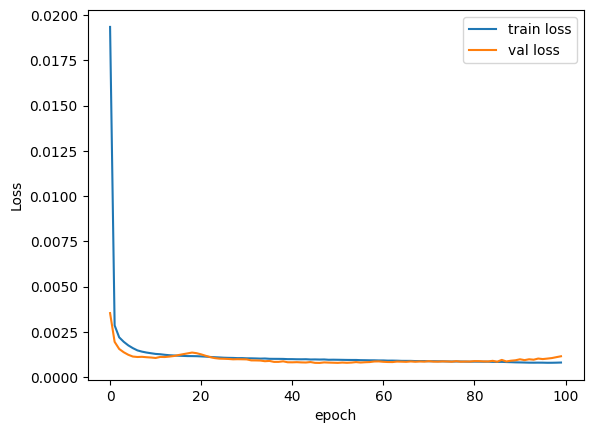

In [198]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

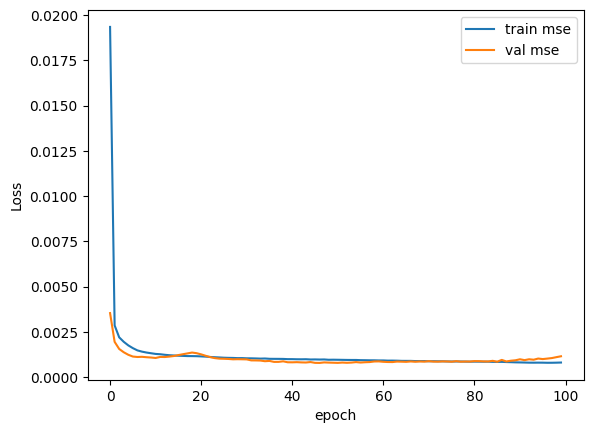

In [199]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

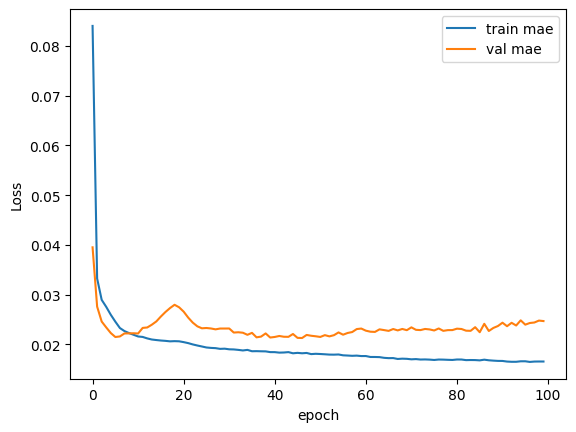

In [200]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_15 (LSTM)              (None, 32)                6272      
                                                                 
 dense_35 (Dense)            (None, 64)                2112      
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 activation_21 (Activation)  (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 activation_22 (Activation)  (None, 64)               

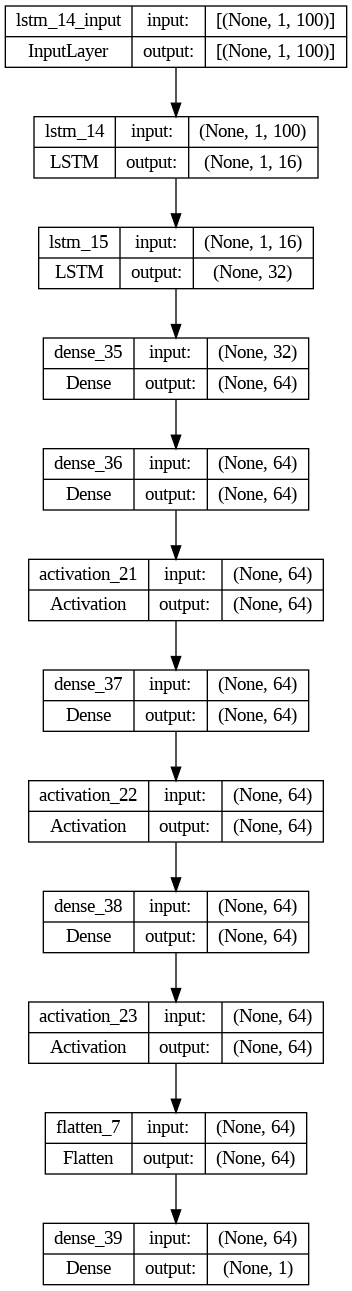

In [201]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [202]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0247    


[0.0011440480593591928, 0.0011440480593591928, 0.024653326719999313]

In [203]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.986613
R2 Score: 0.979094
Max Error: 0.245481


33/33 [==============================] - 0s 1ms/step


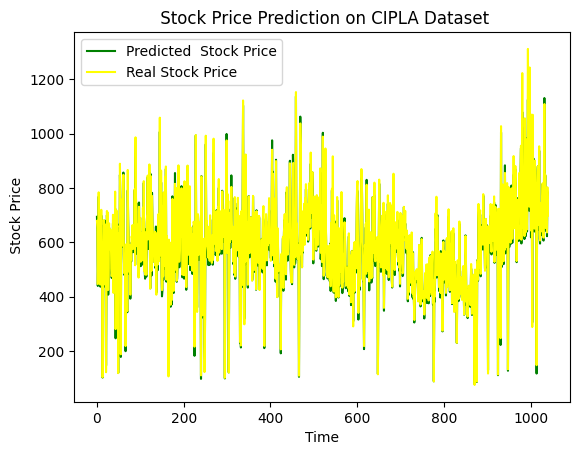

In [204]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on CIPLA Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

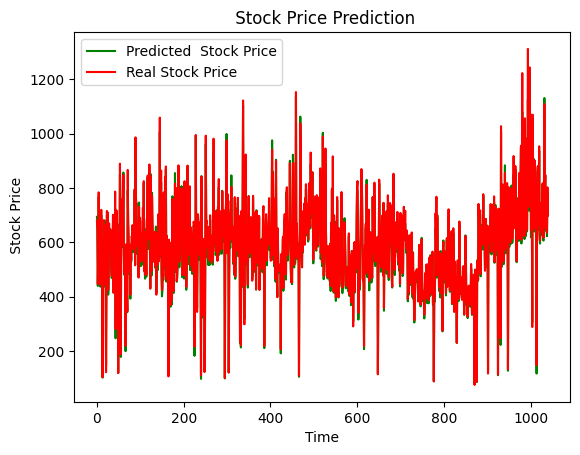

In [205]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [206]:
predicted

array([[693.5561 ],
       [637.87885],
       [438.99567],
       ...,
       [622.1411 ],
       [786.16595],
       [704.7474 ]], dtype=float32)

In [207]:
test_label

array([[678.53706918],
       [652.36185136],
       [446.05757233],
       ...,
       [636.21370201],
       [802.44304289],
       [697.65130296]])

In [208]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       678.537069       693.556091
1       652.361851       637.878845
2       446.057572       438.995667
3       582.035267       545.172485
4       783.787007       767.957703
...            ...              ...
1036    680.887998       648.650513
1037    731.370136       705.309570
1038    636.213702       622.141113
1039    802.443043       786.165955
1040    697.651303       704.747375

[1041 rows x 2 columns]


In [209]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 678.5370691792709  | 693.5560913085938  |
|  1   | 652.3618513573655  | 637.8788452148438  |
|  2   | 446.05757233156896 | 438.99566650390625 |
|  3   | 582.0352668213457  | 545.1724853515625  |
|  4   | 783.7870065789474  | 767.9577026367188  |
|  5   | 610.0515410515411  | 603.3858032226562  |
|  6   | 619.7399246785855  | 615.2108764648438  |
|  7   | 692.9327875059158  | 688.4931030273438  |
|  8   | 444.10517281735196 |  436.12353515625   |
|  9   | 612.1580329935904  | 602.5162353515625  |
|  10  | 719.4487539936104  | 698.4324340820312  |
|  11  | 584.9622073861235  |  572.273193359375  |
|  12  | 535.2313167259787  | 506.46588134765625 |
|  13  | 102.8867047491039  | 101.73748779296875 |
|  14  | 556.8037429643528  | 545.7739868164062  |
|  15  | 443.0436811122245  | 434.41546630859375 |
|  16  | 681.6145724430419  | 6

In [210]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_15 (LSTM)              (None, 32)                6272      
                                                                 
 dense_35 (Dense)            (None, 64)                2112      
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 activation_21 (Activation)  (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 activation_22 (Activation)  (None, 64)               

In [211]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))